# Spectrometer Data Analysis
_Will Kaufman, 2020_



In [45]:
import  numpy as np
from scipy.optimize import curve_fit
import nmrglue as ng

import matplotlib.pyplot as plt

In [37]:
def plot_spectrum(data_p, indices=None):
    x = np.linspace(data_p[0]['procs']['F1P'],
                    data_p[0]['procs']['F2P'],
                    data_p[0]['procs']['FTSIZE'])
    y = data_p[1]
    if indices is not None:
        x = x[indices[0]:indices[1]]
        y = y[indices[0]:indices[1]]
    plt.plot(x, y)

In [3]:
data_raw = ng.bruker.read("tarfile/3014")

In [22]:
data_p = ng.bruker.read_pdata("tarfile/3016/pdata/1/")

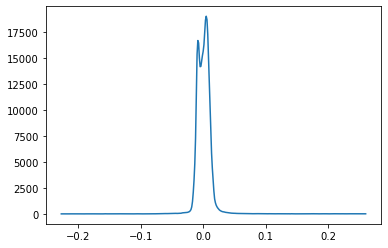

In [59]:
plot_spectrum(data_p, indices=[800, 1200])

In [43]:
amplitudes = np.zeros((40,))
for i in range(40):
    path = f'tarfile/{3014 + i}/pdata/1/'
    data_p = ng.bruker.read_pdata(path)
    amplitudes[i] = np.max(data_p[1])

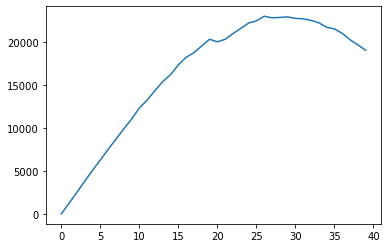

In [44]:
plt.plot(amplitudes)

In [47]:
fit = curve_fit(lambda t, A, omega: A * np.sin(omega * t), np.linspace(0, 40e-6, 40), amplitudes)

In [52]:
fit[0]  # estimates

array([22919.68173599, 54164.51746817])

In [53]:
np.sqrt(np.diag(fit[1]))  # standard errors

array([ 49.28338237, 179.30015564])

In [54]:
np.pi / (2 * fit[0][1])  # estimate for pi/2 hard pulse length

2.900046746872608e-05

In [55]:
179.300155/54164.5174681  # percent error for omega

0.003310288051686202

In [57]:
29 * 0.00331028805168620  # error for pulse length, in us

0.09599835349889979